In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score

<h1 align="center">Data Load</h1>

In [2]:
df = pd.read_excel("Datasets\premiums_rest.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [3]:
df['Genetical_Risk'] = 0

In [4]:
df.shape

(29904, 14)

<h1 align="center">Data Cleaning & EDA</h1>

In [5]:
# Standardizing Column Names

In [6]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


In [7]:
# Checking & Handling Null Values

In [8]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [9]:
df.dropna(inplace = True)

df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [10]:
# Checking Duplicate Values

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop_duplicates(inplace = True)     # In Case of Future Updates

df.duplicated().sum()

np.int64(0)

In [13]:
# Statistics(Handling Numeric Columns)

In [14]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [15]:
# Handling number_of_dependants (min = -3)

In [16]:
df[df.number_of_dependants < 0].shape

(50, 14)

In [17]:
df[df.number_of_dependants < 0]['number_of_dependants'].unique()

array([-1, -3])

In [18]:
df['number_of_dependants'] = abs(df['number_of_dependants'])

df['number_of_dependants'].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [19]:
# Outliers Treatment (Numeric Columns)

In [20]:
numeric_columns = df.select_dtypes(['float64', 'int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

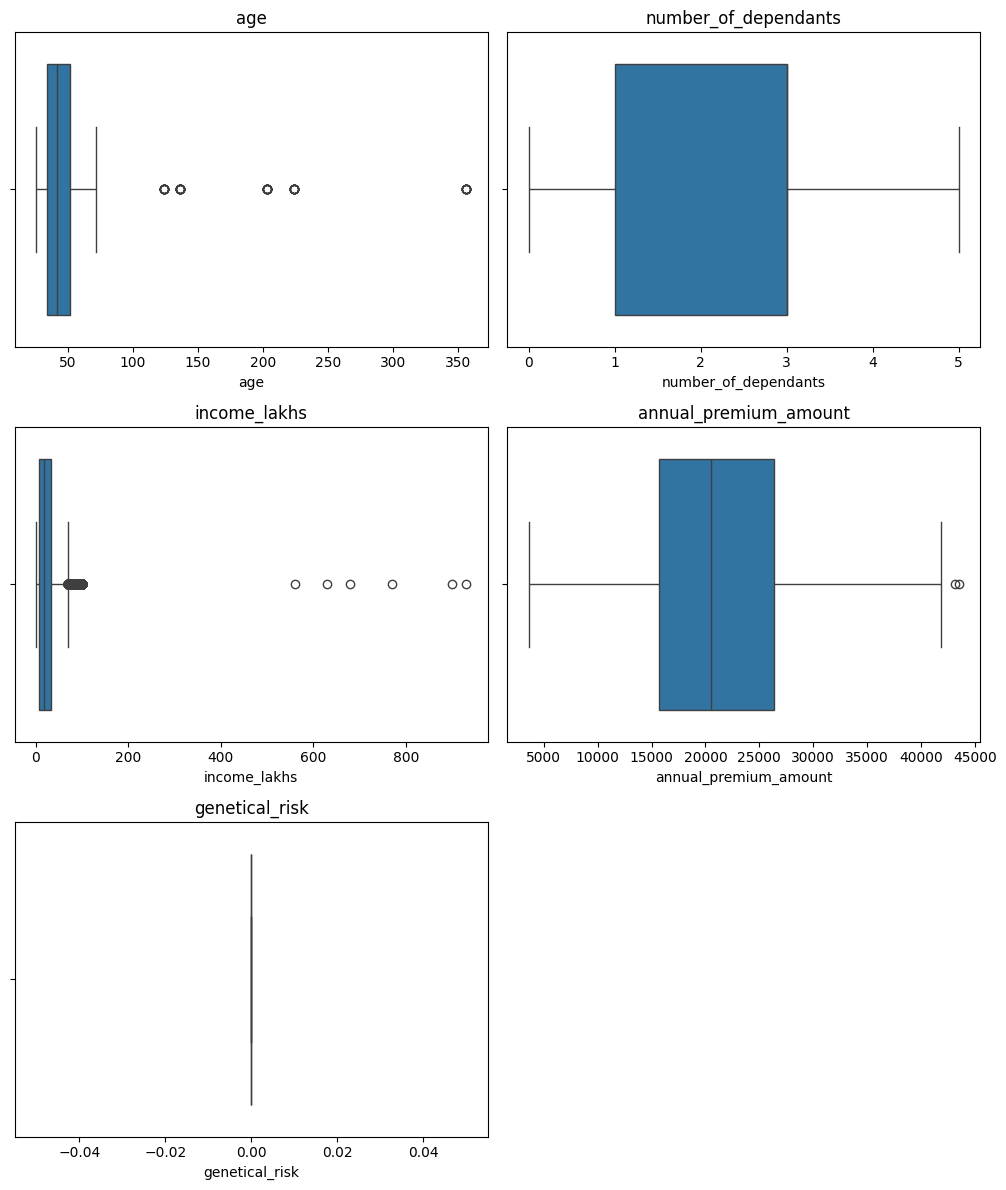

In [21]:
import math

# Get numeric columns dynamically
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

n = len(numeric_columns)               # total number of plots
cols_per_row = 2                        # how many plots per row
rows = math.ceil(n / cols_per_row)      # calculate required rows

fig, axes = plt.subplots(rows, cols_per_row, figsize=(10, rows * 4))
axes = axes.ravel()

for ax, col in zip(axes, numeric_columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)

# Hide any unused subplots
for ax in axes[len(numeric_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [22]:
# AGE Column

In [23]:
df[df.age > 100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
77,224,Male,Northeast,Married,3,Normal,Regular,Salaried,25L - 40L,26,No Disease,Gold,27523,0
488,124,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,46,No Disease,Silver,11752,0
803,124,Female,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,3,No Disease,Bronze,5311,0
902,124,Female,Southwest,Unmarried,1,Overweight,No Smoking,Salaried,<10L,2,Diabetes,Bronze,10238,0
912,136,Male,Southeast,Married,3,Overweight,Regular,Self-Employed,10L - 25L,15,High blood pressure,Gold,31913,0
1097,203,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,<10L,6,Diabetes,Bronze,8762,0
2211,136,Male,Southwest,Married,2,Normal,Regular,Salaried,10L - 25L,20,Diabetes & Thyroid,Gold,31402,0
2556,203,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,18,No Disease,Bronze,5254,0
3426,124,Female,Southeast,Unmarried,1,Normal,No Smoking,Self-Employed,25L - 40L,29,No Disease,Silver,10265,0
3576,136,Male,Southwest,Married,3,Underweight,Regular,Self-Employed,<10L,2,Heart disease,Silver,26127,0


In [24]:
df[df.age > 100].shape

(58, 14)

In [25]:
df[df.age > 100]['age'].unique()

array([224, 124, 136, 203, 356])

In [26]:
df1 = df[df.age <= 100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,43.095380,2.387790,23.371530,20901.900563,0.0
std,11.041991,1.420641,24.751262,6928.457636,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15706.000000,0.0
50%,42.000000,3.000000,17.000000,20496.000000,0.0
75%,52.000000,3.000000,32.000000,26361.000000,0.0
max,72.000000,5.000000,930.000000,43471.000000,0.0


In [27]:
# INCOME Column

In [28]:
def get_iqr_bound(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [29]:
get_iqr_bound(df1.income_lakhs)

(-30.5, 69.5)

In [30]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [31]:
df1[df1.income_lakhs > quantile_threshold]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
1598,51,Male,Northwest,Married,4,Obesity,No Smoking,Self-Employed,> 40L,560,High blood pressure,Gold,30692,0
4657,35,Female,Northeast,Unmarried,0,Overweight,No Smoking,Salaried,> 40L,630,Diabetes,Gold,24010,0
5399,43,Male,Southeast,Married,3,Obesity,Regular,Salaried,> 40L,900,Diabetes & Thyroid,Gold,30848,0
6149,37,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,> 40L,930,Diabetes,Silver,15945,0
21176,59,Male,Northwest,Married,2,Obesity,Occasional,Self-Employed,> 40L,770,Thyroid,Gold,31115,0
24489,48,Male,Northeast,Married,4,Obesity,No Smoking,Salaried,> 40L,680,No Disease,Gold,28926,0


In [32]:
df1[df1.income_lakhs > quantile_threshold].shape

(6, 14)

In [33]:
df2 = df1[df1.income_lakhs <= quantile_threshold].copy()

df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


In [34]:
# Visualising Numeric Columns (after Outlier Treatment)

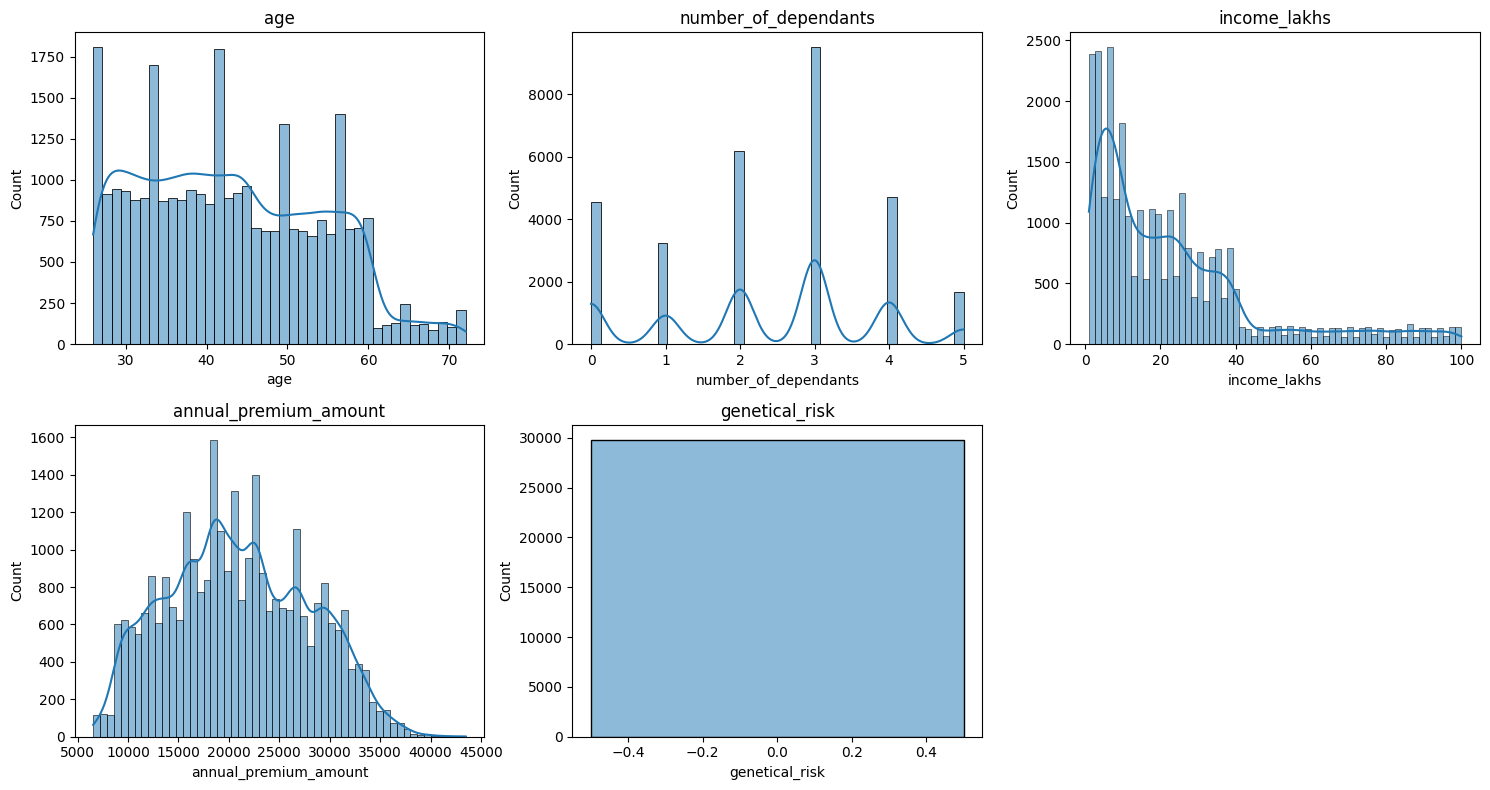

In [35]:
import math

cols_per_row = 3  
num_cols = len(numeric_columns)
num_rows = math.ceil(num_cols / cols_per_row)

fig, axs = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(5 * cols_per_row, 4 * num_rows))
axs = axs.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df2[column], kde=True, ax=axs[i])
    axs[i].set_title(column)

# Hide any unused subplot axes
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [36]:
# Bivariate Analysis (Numeric columns)

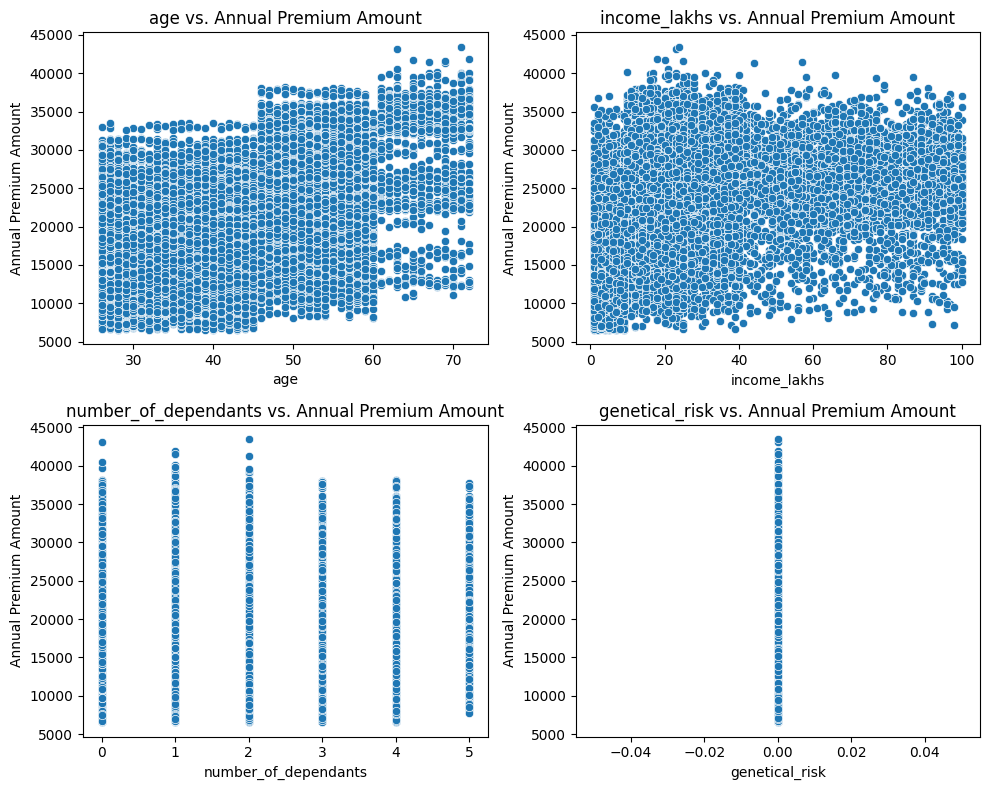

In [37]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants', 'genetical_risk']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes = axes.flatten()

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()
plt.show()

In [38]:
# Statistics(Handling Categorical Columns)

In [39]:
categorical_cols = [
    'gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
    'employment_status', 'income_level', 'medical_history', 'insurance_plan'
]

In [40]:
for col in categorical_cols:
    print(col, ':', df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [41]:
# SMOKING STATUS Column

In [42]:
df2.replace({
    'smoking_status': {
        'Smoking=0': 'No Smoking',
        'Does Not Smoke': 'No Smoking',
        'Not Smoking': 'No Smoking'
    }
}, inplace=True)

df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [43]:
# Univariate Analysis (Categorcal Columns)

In [44]:
pct_count = df2['gender'].value_counts(normalize = True)     # Percentage
pct_count

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64

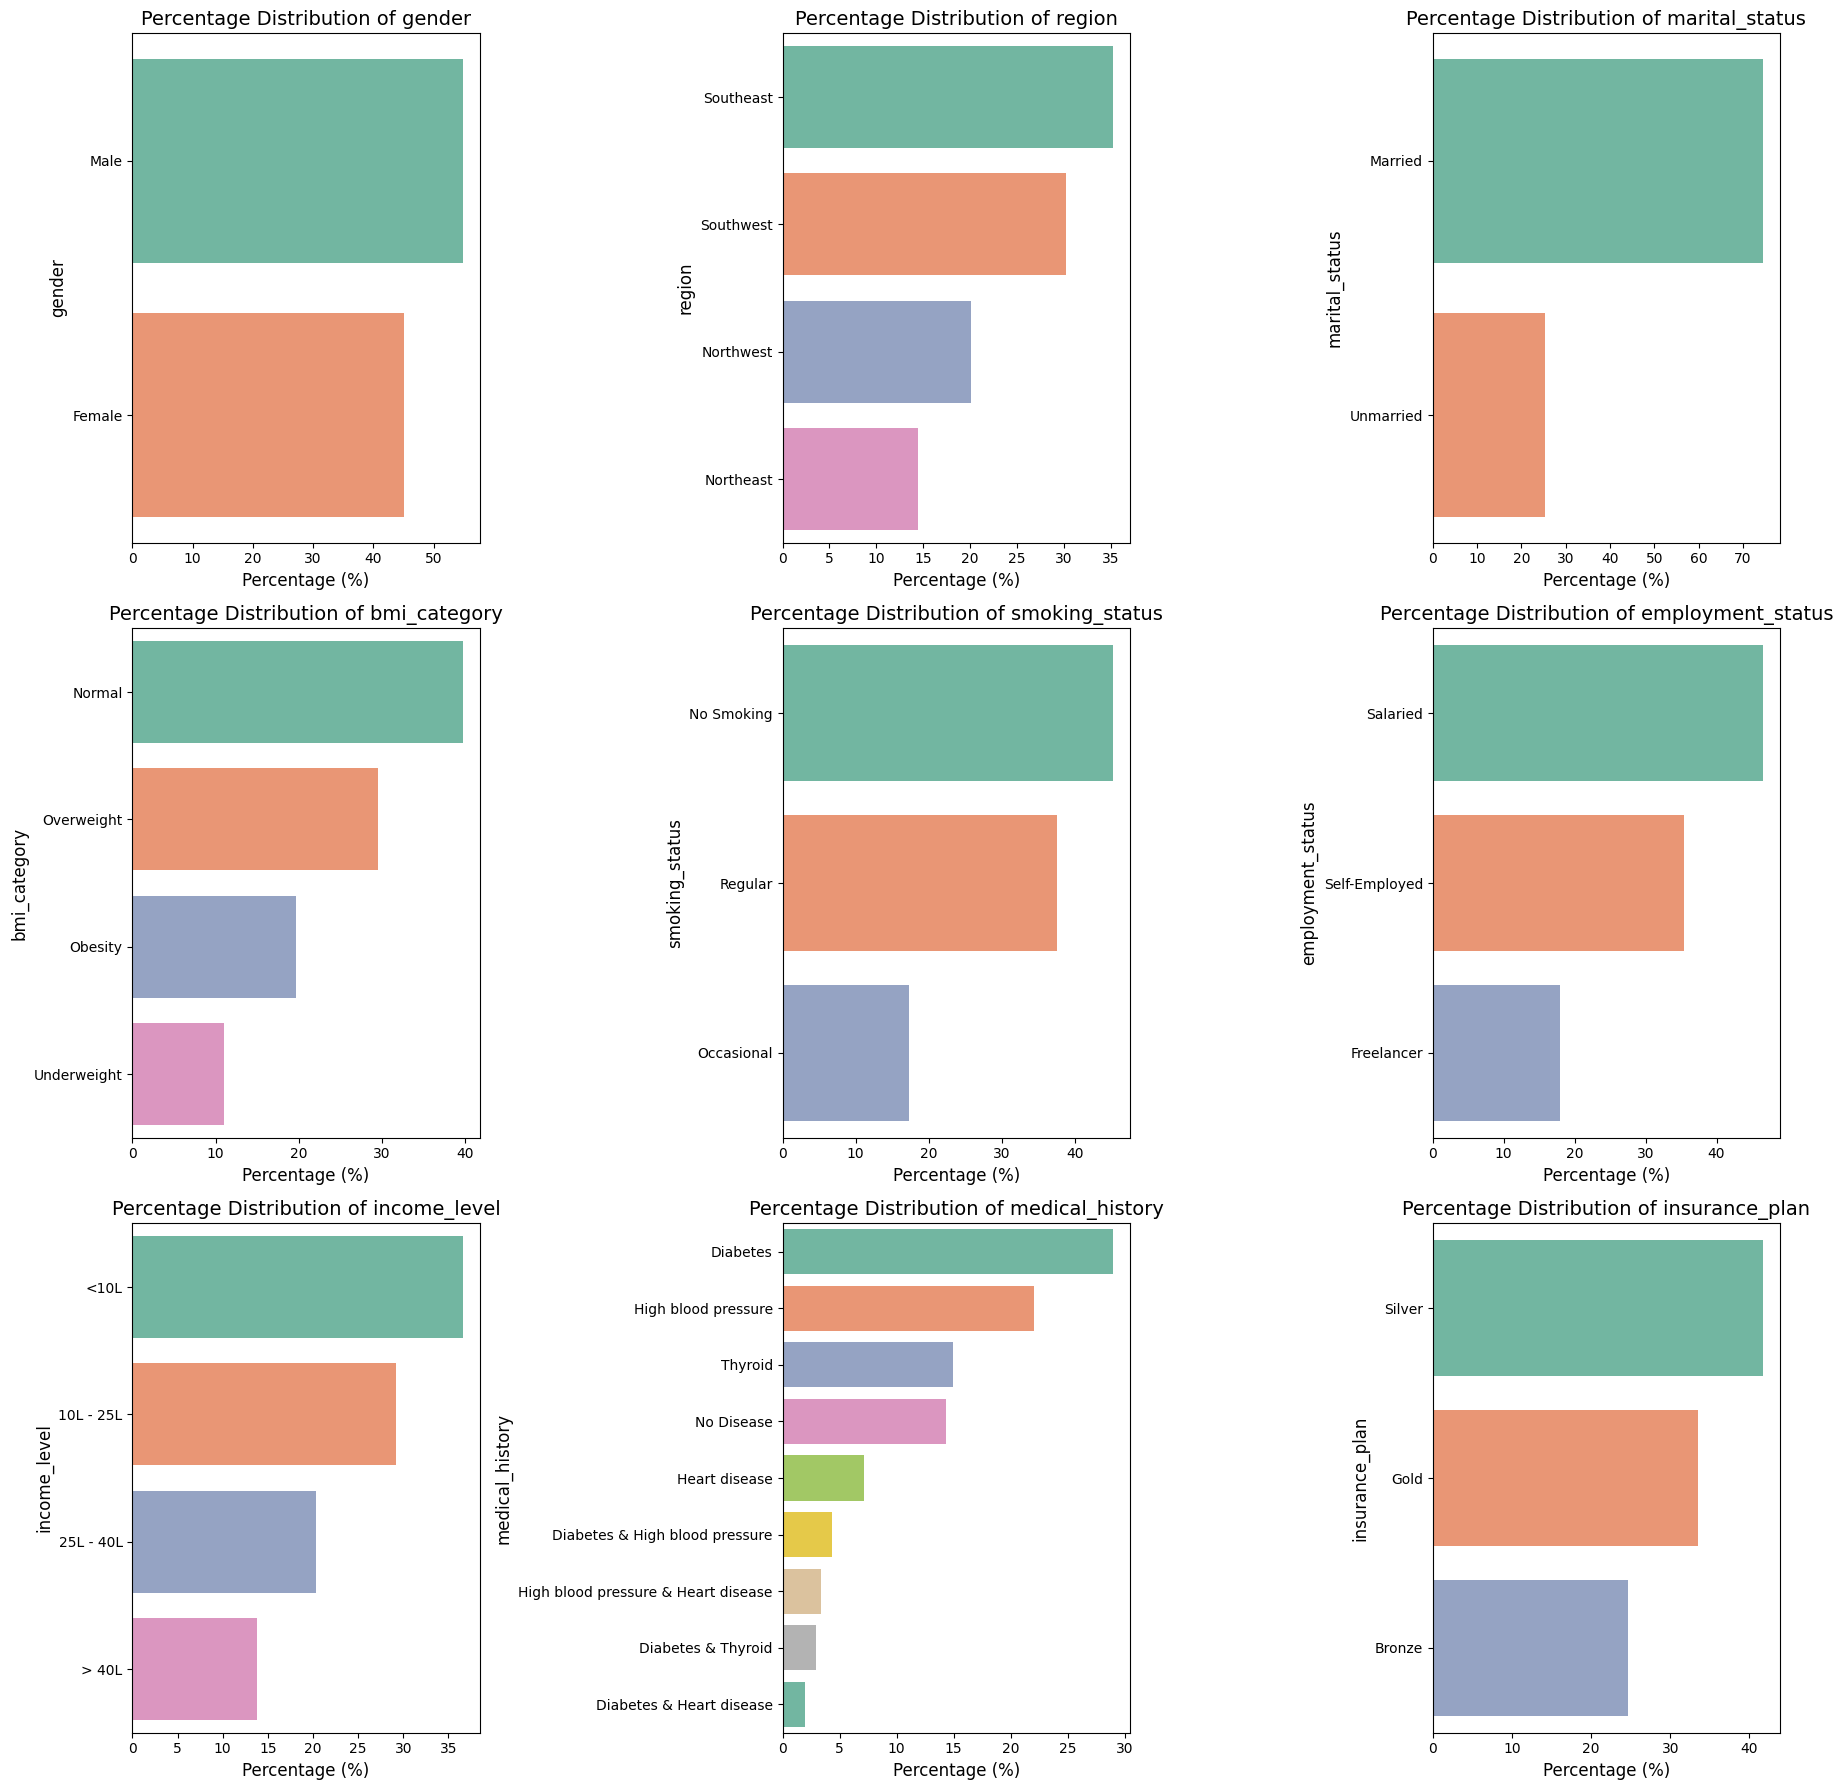

In [45]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()  # Flatten 2D array of axes into 1D for easy looping

# Loop through each categorical column and corresponding subplot axis
for ax, col in zip(axes, categorical_cols):
    # Calculate percentage distribution for each category
    counts = df2[col].value_counts(normalize=True) * 100

    sns.barplot(
        y=counts.index, x=counts.values, hue=counts.index,
        palette="Set2", legend=False, ax=ax
    )
    
    # Set plot title and axis labels
    ax.set_title(f'Percentage Distribution of {col}', fontsize=14)
    ax.set_xlabel('Percentage (%)', fontsize=12)
    ax.set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

In [46]:
# Bivariate Analysis (Categorcal Columns)

In [47]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,214,3287,618


insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


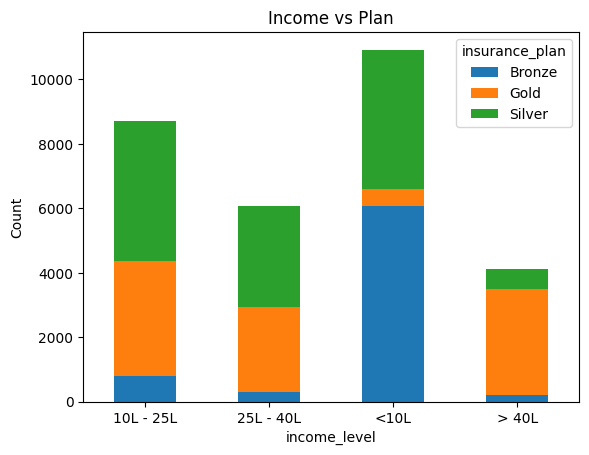

In [48]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

print ('-' * 80)
print ('-' * 80)

crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

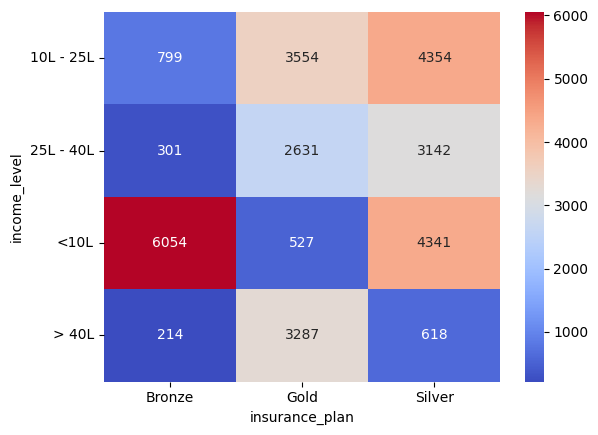

In [49]:
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

<h1 align="center">Feature Engineering</h1>

In [50]:
# MEDICAL HISTORY Column

In [51]:
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


In [52]:
df2['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [53]:
risk_scores = {
    'diabetes' : 6,
    'heart disease': 8,
    'high blood pressure' : 6,
    'thyroid' : 5,
    'no disease' : 0,
    'none' : 0
    
}

df2['medical_history'].str.split(" & ", expand = True).apply(lambda x: x.str.lower()).sample(5)

,0,1
8901,high blood pressure,None
14698,high blood pressure,None
11220,diabetes,None
25657,high blood pressure,None
24970,thyroid,None


In [54]:
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand = True).apply(lambda x: x.str.lower())
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,None
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,None


In [55]:
# Handling Null Values (medical_history)

In [56]:
# Fill missing values (avoids FutureWarning)
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')

# Initialize total risk score
df2['total_risk_score'] = 0

# Calculate total risk score
for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize risk score
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()

df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)

df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,6,0.428571


In [57]:
# INSURANCE PLAN Column (Label Encoding)

In [58]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [59]:
df2['insurance_plan'] = df2['insurance_plan'].map({
    'Bronze' : 1,
    'Silver' : 2,
    'Gold' : 3
})

df2.insurance_plan.unique()

array([1, 2, 3])

In [60]:
# INCOME LEVEL Column (Label Encoding)

In [61]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [62]:
df2['income_level'] = df2['income_level'].map({
    '<10L' : 1,
    '10L - 25L' : 2,
    '25L - 40L': 3,
    '> 40L' : 4
})

df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,0,high blood pressure,none,6,0.428571


In [63]:
# Handling Nominal Columns

In [64]:
nominal_cols = [
    'gender',
    'region',
    'marital_status',
    'bmi_category',
    'smoking_status',
    'employment_status'
]

df3 = pd.get_dummies(df2, columns = nominal_cols, drop_first = True, dtype = int)

df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,0,no disease,none,...,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,Diabetes,1,15610,0,diabetes,none,...,0,0,0,1,0,0,1,0,0,1


In [65]:
# Dropping Unnecessary Columns

In [66]:
df4 = df3.drop(['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis = 1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [67]:
# Visualising Correlation

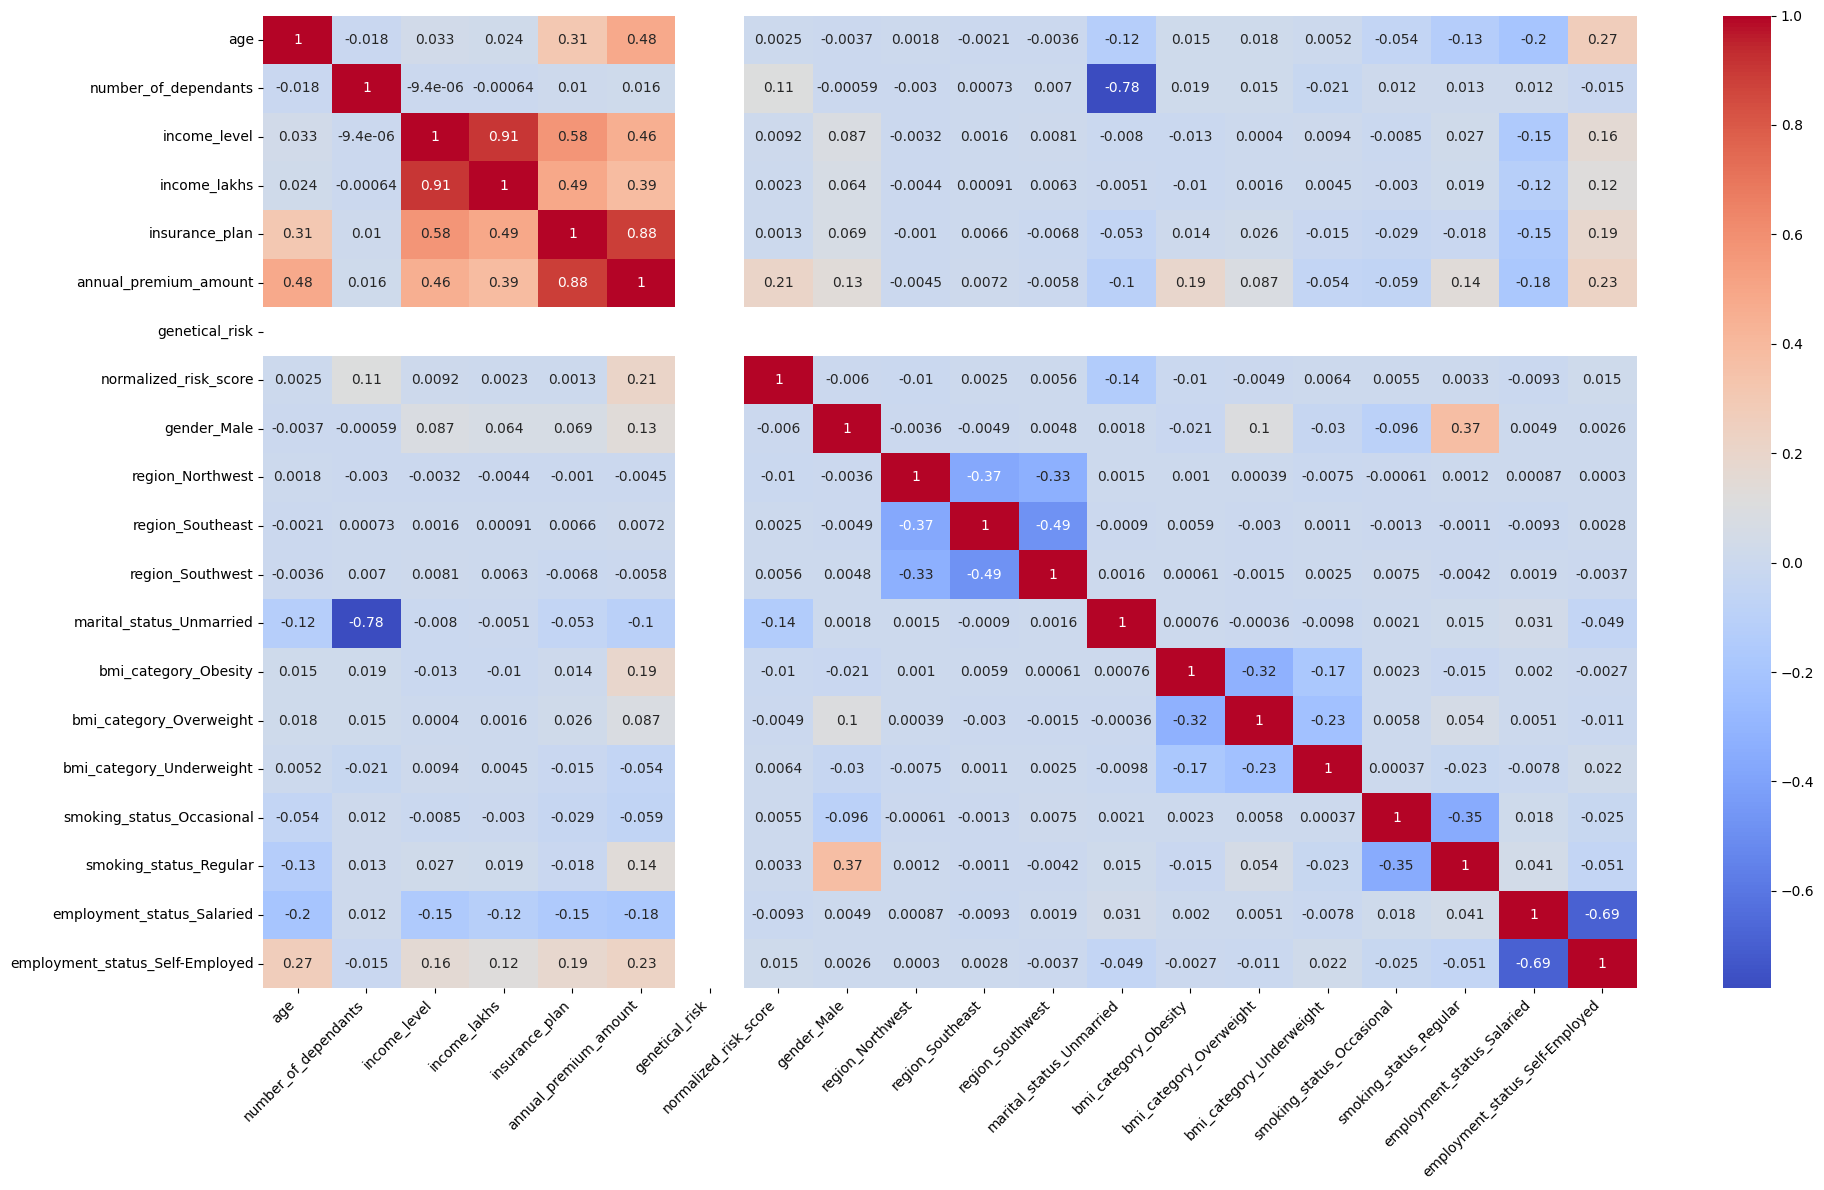

In [68]:
cm = df4.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [69]:
# Variance Inflation Factor (VIF)

In [70]:
# Scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler

X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan', 'genetical_risk']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.000000,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.000000,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.333333,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,1.000000,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.333333,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [72]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
# Calculating VIF

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    # Remove constant columns (zero variance)
    data = data.loc[:, data.apply(pd.Series.nunique) > 1]

    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [
        variance_inflation_factor(data.values, i) 
        for i in range(data.shape[1])
    ]

    # Replace infinite values with NaN
    vif_df['VIF'] = vif_df['VIF'].replace([np.inf, -np.inf], np.nan)

    return vif_df

In [75]:
calculate_vif(X)

,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,normalized_risk_score,3.810619
6,gender_Male,2.599098
7,region_Northwest,2.123965
8,region_Southeast,2.980842
9,region_Southwest,2.710097


In [76]:
calculate_vif(X.drop('income_level', axis = 'columns'))

,Column,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,normalized_risk_score,3.808345
5,gender_Male,2.591439
6,region_Northwest,2.123277
7,region_Southeast,2.979899
8,region_Southwest,2.708641
9,marital_status_Unmarried,2.345757


In [77]:
X_reduced = X.drop('income_level', axis = 'columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


<h1 align="center">Model Training</h1>

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.3, random_state = 10)

print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)

X_train : (20875, 18)
X_test  : (8947, 18)
y_train : (20875,)
y_test  : (8947,)


In [79]:
# LINEAR REGRESSION MODEL

In [80]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)

train_score, test_score

(0.9534163989489616, 0.9538448451629948)

In [81]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  2183844.360312456 RMSE:  1477.7835972538253


In [82]:
model_lr.intercept_

np.float64(5935.981289344609)

In [83]:
model_lr.coef_

array([ 7016.23932829, -1311.76470171,  -708.19336921, 14835.98820801,
           0.        ,  6053.6241234 ,    37.55826883,   -55.25087215,
         -19.62254288,   -22.28967559,  -700.32019985,  3926.8127061 ,
        1979.45604663,   612.86623617,   837.3951011 ,  2800.66184334,
         -45.49136706,   243.07842087])

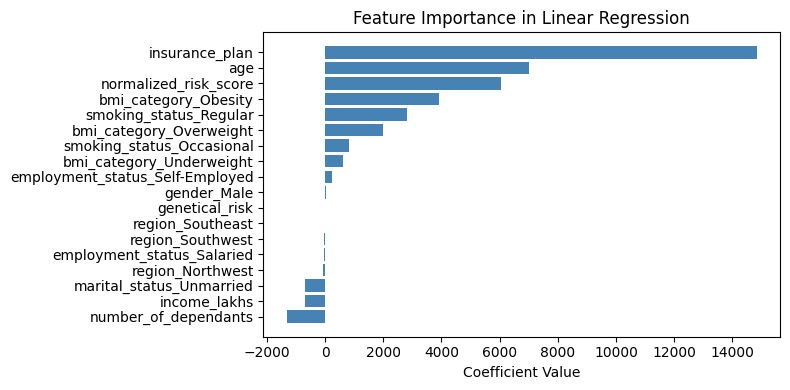

In [84]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances, index = X_test.columns, columns = ['Coefficients'])
coef_df = coef_df.sort_values(by = 'Coefficients', ascending = True)

plt.figure(figsize = (8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color = 'steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')

plt.tight_layout()
plt.show()

In [85]:
# RIDGE REGRESSION MODEL

In [86]:
model_rg = Ridge()
model_rg.fit(X_train, y_train)

train_score_rg = model_rg.score(X_test, y_test)
test_score_rg = model_rg.score(X_test, y_test)

train_score_rg, test_score_rg

(0.9538456995663842, 0.9538456995663842)

In [87]:
y_pred_rg = model_rg.predict(X_test)

mse_rg = mean_squared_error(y_test, y_pred_rg)
rmse_rg = np.sqrt(mse_rg)

print("Ridge Regression ==> MSE: ", mse_rg, "RMSE: ", rmse_rg)

Ridge Regression ==> MSE:  2183803.9339715634 RMSE:  1477.769919159124


In [88]:
# XGBOOST MODEL

In [89]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

train_score_xgb = model_xgb.score(X_train, y_train)
test_score_xgb = model_xgb.score(X_test, y_test)

train_score_xgb, test_score_xgb

(0.9986370801925659, 0.9979538321495056)

In [90]:
y_pred_xgb = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("XGBoost Regression ==> MSE: ", mse_xgb, "RMSE: ", rmse_xgb)

XGBoost Regression ==> MSE:  96814.21875 RMSE:  311.1498332797239


In [91]:
model_xgb.intercept_

array([20932.395], dtype=float32)

In [92]:
# Selecting Best Hyperparameters

In [93]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators' : [20, 40, 50],
    'learning_rate' : [0.01, 0.1, 0.2],
    'max_depth' : [3, 4, 5]
}

random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter = 10, cv = 3, scoring = 'r2', random_state = 42, n_jobs = -1)
random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9970577955245972)

In [94]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [95]:
best_model = random_search.best_estimator_

In [96]:
# Visualization

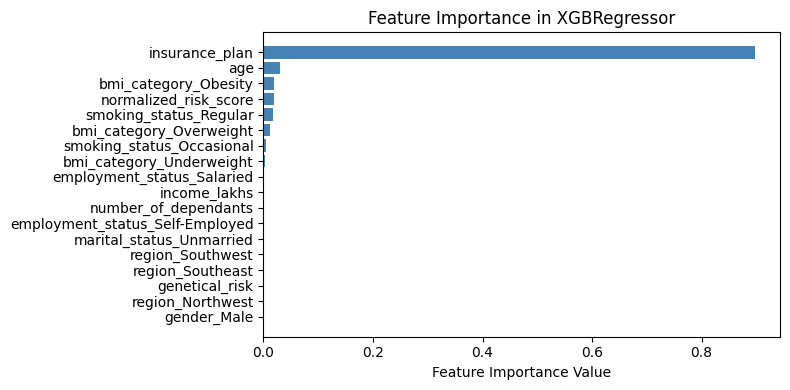

In [97]:
feature_importances_xgb = best_model.feature_importances_

coef_df_xgb = pd.DataFrame(feature_importances_xgb, index=X_test.columns, columns=['Feature Importance'])
coef_df_xgb = coef_df_xgb.sort_values(by='Feature Importance', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df_xgb.index, coef_df_xgb['Feature Importance'], color='steelblue')
plt.xlabel('Feature Importance Value')
plt.title('Feature Importance in XGBRegressor')

plt.tight_layout()
plt.show()

<h1 align="center">Error Analysis</h1>

In [98]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = residuals * 100 / y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted' : y_pred,
    'diff' : residuals,
    'diff_pct' : residuals_pct
})

results_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26691.470703,-203.529297,-0.756755
14750,22734,22650.751953,-83.248047,-0.366183
19932,21198,21581.894531,383.894531,1.810994
29643,9100,9425.934570,325.934570,3.581699
17076,26434,26691.470703,257.470703,0.974013


In [99]:
# Visualising Errors

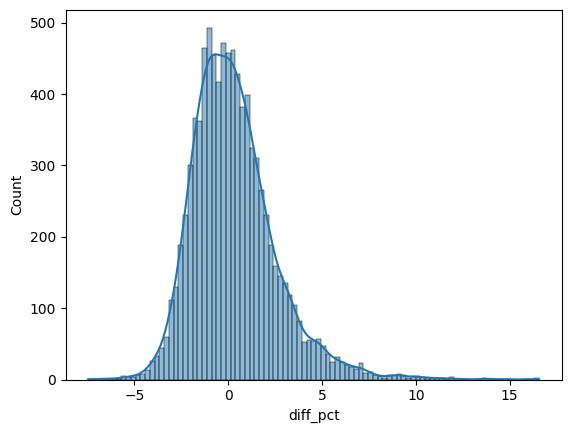

In [100]:
sns.histplot(results_df['diff_pct'], kde = True)
plt.show()

In [101]:
# Handling Errors (Setting a Threshold)

In [102]:
results_df[np.abs(results_df.diff_pct) > 10]

,actual,predicted,diff,diff_pct
14286,6845,7621.263672,776.263672,11.340594
27518,8502,9425.934570,923.934570,10.867261
9285,6872,7621.263672,749.263672,10.903138
7547,6538,7621.263672,1083.263672,16.568732
21910,6651,7621.263672,970.263672,14.588237
12189,6571,7621.263672,1050.263672,15.983316
21141,10722,11841.492188,1119.492188,10.441076
16263,8206,9063.517578,857.517578,10.449885
8216,6635,7621.263672,986.263672,14.864562
13973,10583,11841.492188,1258.492188,11.891639


In [103]:
extreme_error_threshold = 10

extreme_results_df = results_df[np.abs(results_df.diff_pct) > extreme_error_threshold]
extreme_results_df.shape

(29, 4)

In [104]:
results_df.shape

(8947, 4)

In [105]:
extreme_error_pct = extreme_results_df.shape[0] * 100 / results_df.shape[0]     # 3% Records have Error Margin > 10%
extreme_error_pct

0.32413099362914943

In [106]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
14286,0.021739,0.6,0.050505,0.0,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,1,0
27518,0.304348,0.6,0.080808,0.0,0.0,0.357143,1,1,0,0,0,0,0,0,0,0,0,1
9285,0.326087,0.6,0.010101,0.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
7547,0.347826,0.2,0.080808,0.0,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,1,0
21910,0.043478,0.6,0.020202,0.0,0.0,0.000000,1,0,1,0,0,0,0,0,0,0,0,0


<h1 align="center">Exporting the Model</h1>

In [107]:
from joblib import dump

dump(best_model, 'Arti_Facts/model_rest.joblib')

['Arti_Facts/model_rest.joblib']

In [108]:
scaler_with_cols = {
    'scaler' : scaler,
    'cols_to_scale' : cols_to_scale
}

dump(scaler_with_cols, 'Arti_Facts/scaler_rest.joblib')

['Arti_Facts/scaler_rest.joblib']